# Learning Pandas
Pandas is a Python library for data manipulation and analysis. It is built on top of NumPy and provides powerful tools to work with structured data (like tables in Excel or SQL).

It allows you to:

- Load, clean, and process datasets
- Perform exploratory data analysis (EDA)
- Handle missing data efficiently
- Merge, group, and reshape datasets
- Key Data Structures in Pandas

Series: A one-dimensional array with labels (like a column in a spreadsheet)

DataFrame: A two-dimensional table-like data structure (like a whole spreadsheet).

## Basics

In [ ]:
# installing pandas
%pip install pandas

# "!pip install" also works

In [2]:
# importing
import pandas as pd
print(pd.__version__)

2.2.3


In [3]:
# series data - 1D data structure
data = [10, 20, 30, 40, 50]
series1 = pd.Series(data) # creating series from list
print(series1)

0    10
1    20
2    30
3    40
4    50
dtype: int64


The first Series automatically gets a default index (0, 1, 2, ...)

In [4]:
# custom label in series
series1 = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
print(series1)

index = [11, 22, 33, 44, 55]
series1 = pd.Series(data, index=index)
print(series1)

a    10
b    20
c    30
d    40
e    50
dtype: int64
11    10
22    20
33    30
44    40
55    50
dtype: int64


In [5]:
# dataframe - 2D data structure
data = {'Name': ['Anjali', 'Priya', 'Rahul'],
        'Age': [24, 26, 20],
        'Salary':[50000, 60000, 20000]}

df = pd.DataFrame(data) # creating dataframe from dictionary
print(df)

     Name  Age  Salary
0  Anjali   24   50000
1   Priya   26   60000
2   Rahul   20   20000


In [6]:
# series from numpy array
import numpy as np

arr = np.array([1, 2, 3, 4, 5]) # creating numpy array
series = pd.Series(arr) # series data from numpy 1D array

print(arr)
print(series)

[1 2 3 4 5]
0    1
1    2
2    3
3    4
4    5
dtype: int32


## Exploring and Inspecting Data

In [7]:
# how the data looks like
data = {'Name': ['Anjali', 'Priya', 'Rahul'],
        'Age': [24, 26, 20],
        'Salary':[50000, 60000, 20000]}

df = pd.DataFrame(data)
print(df)

     Name  Age  Salary
0  Anjali   24   50000
1   Priya   26   60000
2   Rahul   20   20000


In [8]:
# displaying

print(df) # entire data
print(df.head(2)) # first 2 rows
print(df.tail(2)) # last 2 rows

     Name  Age  Salary
0  Anjali   24   50000
1   Priya   26   60000
2   Rahul   20   20000
     Name  Age  Salary
0  Anjali   24   50000
1   Priya   26   60000
    Name  Age  Salary
1  Priya   26   60000
2  Rahul   20   20000


In [9]:
# shapes and columns

print(df.shape) # gives no. of rows, no. of cols
print(df.columns) # list of column names
print('\n')
print(df.dtypes) # data types in each col


(3, 3)
Index(['Name', 'Age', 'Salary'], dtype='object')


Name      object
Age        int64
Salary     int64
dtype: object


In [10]:
# statistics

print(df.describe()) # descriptive statistics for numeric cols
# note that describe and describe() is different

print(df.describe(include='all')) # descriptive statistics for all cols)

             Age        Salary
count   3.000000      3.000000
mean   23.333333  43333.333333
std     3.055050  20816.659995
min    20.000000  20000.000000
25%    22.000000  35000.000000
50%    24.000000  50000.000000
75%    25.000000  55000.000000
max    26.000000  60000.000000
          Name        Age        Salary
count        3   3.000000      3.000000
unique       3        NaN           NaN
top     Anjali        NaN           NaN
freq         1        NaN           NaN
mean       NaN  23.333333  43333.333333
std        NaN   3.055050  20816.659995
min        NaN  20.000000  20000.000000
25%        NaN  22.000000  35000.000000
50%        NaN  24.000000  50000.000000
75%        NaN  25.000000  55000.000000
max        NaN  26.000000  60000.000000


In [11]:
# missing values

data = {'Name': ['Anjali', None, 'Rahul'],
        'Age': [24, 26, 20],
        'Salary':[50000, 60000, None]}

df = pd.DataFrame(data)
print(df)

print(df.isnull()) # checks for missing values
print(df.isnull().sum()) # counts missing values in each col

     Name  Age   Salary
0  Anjali   24  50000.0
1    None   26  60000.0
2   Rahul   20      NaN
    Name    Age  Salary
0  False  False   False
1   True  False   False
2  False  False    True
Name      1
Age       0
Salary    1
dtype: int64


## Selecting and Accessing

In [12]:
print(df['Age']) # accessing Age col

0    24
1    26
2    20
Name: Age, dtype: int64


In [13]:
print(df.Age) # dot notation works when col name is simple

0    24
1    26
2    20
Name: Age, dtype: int64


In [14]:
print(df[['Name', 'Salary']]) # accessing multiple cols

cols = ['Age', 'Name']
print(df[cols]) # using the list to access cols

     Name   Salary
0  Anjali  50000.0
1    None  60000.0
2   Rahul      NaN
   Age    Name
0   24  Anjali
1   26    None
2   20   Rahul


In [15]:
print(df) # checking the DataFrame once

     Name  Age   Salary
0  Anjali   24  50000.0
1    None   26  60000.0
2   Rahul   20      NaN


In [16]:
# selecting rows

print(df.iloc[0]) # first row by position
# iloc used for integer based indexing

print(df.loc[2]) # first row by label
# loc used for label based indexing

Name       Anjali
Age            24
Salary    50000.0
Name: 0, dtype: object
Name      Rahul
Age          20
Salary      NaN
Name: 2, dtype: object


In [17]:
data = {'Name': ['Anjali', None, 'Rahul'],
        'Age': [24, 26, 20],
        'Salary':[50000, 60000, None]}

df = pd.DataFrame(data, index=['a', 'b', 'c']) # keeping labels
print(df)

     Name  Age   Salary
a  Anjali   24  50000.0
b    None   26  60000.0
c   Rahul   20      NaN


In [18]:
# selecting rows again

print(df.iloc[1]) # row by position, 1 selects 2nd row

# print(df.loc[1]) # gives error

print(df.loc['c']) # label based indexing

Name         None
Age            26
Salary    60000.0
Name: b, dtype: object
Name      Rahul
Age          20
Salary      NaN
Name: c, dtype: object


Use `.iloc[]` for integer-based indexing

Use `.loc[]` for label-based indexing

In [19]:
# slicing rows and cols

print(df.iloc[:2, : ]) # first two rows and all cols

print(df.loc['a':'c', ['Name', 'Salary']]) # label based slicing and selecting specific cols

     Name  Age   Salary
a  Anjali   24  50000.0
b    None   26  60000.0
     Name   Salary
a  Anjali  50000.0
b    None  60000.0
c   Rahul      NaN


## Filtering, Sorting and Modifying Data

In [20]:
data = {'Name': ['Anjali', 'Bubbles', 'Rahul', 'Priya', 'Newton'],
        'Age': [24, 26, 20, 27, 38],
        'Salary':[50000, 60000, 20000, 23000, 44000]}

df = pd.DataFrame(data) # making sample dataframe
print(df)

      Name  Age  Salary
0   Anjali   24   50000
1  Bubbles   26   60000
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000


In [21]:
# filtering

filtered_df = df[df["Age"] > 25] # selecting rows where age>25
print(filtered_df)

      Name  Age  Salary
1  Bubbles   26   60000
3    Priya   27   23000
4   Newton   38   44000


In [22]:
# using & (AND) and | (OR)

filtered_df  = df[(df['Age'] > 25) & (df['Salary'] <45000)] # using the AND operator
print(filtered_df)

filtered_df  = df[(df['Age'] > 25) | (df['Age'] < 22)] # using the AND operator
print(filtered_df)

     Name  Age  Salary
3   Priya   27   23000
4  Newton   38   44000
      Name  Age  Salary
1  Bubbles   26   60000
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000


In [23]:
# sorting data

sorted_df = df.sort_values('Age') # sorting according to Age col
print(sorted_df)

# descending order of sort using ascending = False parameter

sorted_df = df.sort_values('Name', ascending=False) # sorting according to Name col
print(sorted_df)

sorted_df = df.sort_values(['Age', 'Name'], ascending=[True, False])
print(sorted_df)

      Name  Age  Salary
2    Rahul   20   20000
0   Anjali   24   50000
1  Bubbles   26   60000
3    Priya   27   23000
4   Newton   38   44000
      Name  Age  Salary
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000
1  Bubbles   26   60000
0   Anjali   24   50000
      Name  Age  Salary
2    Rahul   20   20000
0   Anjali   24   50000
1  Bubbles   26   60000
3    Priya   27   23000
4   Newton   38   44000


In [24]:
# renaming cols

print(df)
df_renamed = df.rename(columns={"Name": "Employee Name", 'Salary': 'Annual Salary'})
print(df_renamed)

      Name  Age  Salary
0   Anjali   24   50000
1  Bubbles   26   60000
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000
  Employee Name  Age  Annual Salary
0        Anjali   24          50000
1       Bubbles   26          60000
2         Rahul   20          20000
3         Priya   27          23000
4        Newton   38          44000


In [25]:
# adding a new col

data = {'Name': ['Anjali', 'Bubbles', 'Rahul', 'Priya', 'Newton'],
        'Age': [24, 26, 20, 27, 38],
        'Salary':[50000, 60000, 20000, 23000, 44000]}

df = pd.DataFrame(data) # making sample dataframe
print(df)

df['Bonus'] = df['Salary'] * 0.01 # making new col Bonus as 1% of Salary col
df['Net Salary'] = df['Salary'] + df['Bonus'] # making new col based on previous cols

print(df)

      Name  Age  Salary
0   Anjali   24   50000
1  Bubbles   26   60000
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000
      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   50000  500.0     50500.0
1  Bubbles   26   60000  600.0     60600.0
2    Rahul   20   20000  200.0     20200.0
3    Priya   27   23000  230.0     23230.0
4   Newton   38   44000  440.0     44440.0


In [26]:
# modifying existing cols

df['Salary'] = df['Salary'] + 10000 # increasing salary by 10000
print(df)

# updating bonus and net salary

df['Bonus'] = df['Salary'] * 0.01 # making new col Bonus as 1% of Salary col
df['Net Salary'] = df['Salary'] + df['Bonus'] # making new col based on previous cols

print(df)

      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   60000  500.0     50500.0
1  Bubbles   26   70000  600.0     60600.0
2    Rahul   20   30000  200.0     20200.0
3    Priya   27   33000  230.0     23230.0
4   Newton   38   54000  440.0     44440.0
      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   60000  600.0     60600.0
1  Bubbles   26   70000  700.0     70700.0
2    Rahul   20   30000  300.0     30300.0
3    Priya   27   33000  330.0     33330.0
4   Newton   38   54000  540.0     54540.0


In [27]:
# dropping rows or cols
print(df)

      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   60000  600.0     60600.0
1  Bubbles   26   70000  700.0     70700.0
2    Rahul   20   30000  300.0     30300.0
3    Priya   27   33000  330.0     33330.0
4   Newton   38   54000  540.0     54540.0


In [28]:
# drop col
df_dropped = df.drop(columns=['Bonus'])
print(df)
print(df_dropped)

      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   60000  600.0     60600.0
1  Bubbles   26   70000  700.0     70700.0
2    Rahul   20   30000  300.0     30300.0
3    Priya   27   33000  330.0     33330.0
4   Newton   38   54000  540.0     54540.0
      Name  Age  Salary  Net Salary
0   Anjali   24   60000     60600.0
1  Bubbles   26   70000     70700.0
2    Rahul   20   30000     30300.0
3    Priya   27   33000     33330.0
4   Newton   38   54000     54540.0


In [29]:
# drop row by index
df_dropped = df.drop(index=1)
print(df)
print(df_dropped)

      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   60000  600.0     60600.0
1  Bubbles   26   70000  700.0     70700.0
2    Rahul   20   30000  300.0     30300.0
3    Priya   27   33000  330.0     33330.0
4   Newton   38   54000  540.0     54540.0
     Name  Age  Salary  Bonus  Net Salary
0  Anjali   24   60000  600.0     60600.0
2   Rahul   20   30000  300.0     30300.0
3   Priya   27   33000  330.0     33330.0
4  Newton   38   54000  540.0     54540.0


In [30]:
# reinitializing

data = {'Name': ['Anjali', 'Bubbles', 'Rahul', 'Priya', 'Newton'],
        'Age': [24, 26, 20, 27, 38],
        'Salary':[50000, 60000, 20000, 23000, 44000]}

df = pd.DataFrame(data) # making sample dataframe
print(df)

df['Bonus'] = df['Salary'] * 0.01 # making new col Bonus as 1% of Salary col
df['Net Salary'] = df['Salary'] + df['Bonus'] # making new col based on previous cols

print(df)

      Name  Age  Salary
0   Anjali   24   50000
1  Bubbles   26   60000
2    Rahul   20   20000
3    Priya   27   23000
4   Newton   38   44000
      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   50000  500.0     50500.0
1  Bubbles   26   60000  600.0     60600.0
2    Rahul   20   20000  200.0     20200.0
3    Priya   27   23000  230.0     23230.0
4   Newton   38   44000  440.0     44440.0


In [31]:
# setting Name as index
df_indexed = df.set_index('Name')
print(df_indexed)

         Age  Salary  Bonus  Net Salary
Name                                   
Anjali    24   50000  500.0     50500.0
Bubbles   26   60000  600.0     60600.0
Rahul     20   20000  200.0     20200.0
Priya     27   23000  230.0     23230.0
Newton    38   44000  440.0     44440.0


In [32]:
# resetting the index

df_reset = df_indexed.reset_index(drop=False) # keep Name as col
print(df_reset)

      Name  Age  Salary  Bonus  Net Salary
0   Anjali   24   50000  500.0     50500.0
1  Bubbles   26   60000  600.0     60600.0
2    Rahul   20   20000  200.0     20200.0
3    Priya   27   23000  230.0     23230.0
4   Newton   38   44000  440.0     44440.0


In [33]:
# resetting the index

df_reset = df_indexed.reset_index(drop=True) # drop Name as col
print(df_reset)

   Age  Salary  Bonus  Net Salary
0   24   50000  500.0     50500.0
1   26   60000  600.0     60600.0
2   20   20000  200.0     20200.0
3   27   23000  230.0     23230.0
4   38   44000  440.0     44440.0


## CSV

In [34]:
# pandas.read_csv(filepath_or_buffer, sep=',', header='infer', names=None, index_col=None, usecols=None, dtype=None, engine='python', encoding=None, ... )

In [35]:
# reading from csv file

df = pd.read_csv('employee_data.csv')
print(df.head()) # printing first 5 rows

  Employee ID           Name Department  Age  Salary Joining Date  \
0      E00001  Daniel Miller  Marketing   37  120145   2021-08-19   
1      E00002  Robert Taylor      Sales   39   37839   2015-02-06   
2      E00003      Jose Lane    Finance   22  121732   2022-06-10   
3      E00004  William Watts      Sales   22   68457   2018-08-16   
4      E00005     Tracy Ward      Sales   22  146584   2024-02-22   

   Performance Score  
0                  7  
1                  2  
2                  3  
3                  2  
4                  5  


In [36]:
# DataFrame.to_csv(path_or_buffer, sep=',', index=True, header=True, mode='w', encoding=None, compression=None, ... )

In [37]:
# writing to csv file

df.to_csv('copy_employee_data.csv', index=False) # do not include row indices

In [38]:
# skip rows

df = pd.read_csv('employee_data.csv', skiprows=10000)
print(df.head())

   E10000      William Blake    Finance  27  131484  2016-03-17  1
0  E10001  Michael Maldonado         IT  58  106088  2015-10-11  4
1  E10002   Samantha Hoffman  Marketing  43   70584  2017-08-27  2
2  E10003        Heather Lee      Sales  28   80296  2022-01-07  5
3  E10004       Sarah Nelson  Marketing  51   46482  2015-04-15  4
4  E10005     Steven Sanders  Marketing  31  148337  2015-12-20  1


In [39]:
# reading in chunks for large files

chunks = pd.read_csv('employee_data.csv', chunksize= 1000) # 1000 rows at a time
for chunk in chunks:
    print(chunk.head(), '\n')

  Employee ID           Name Department  Age  Salary Joining Date  \
0      E00001  Daniel Miller  Marketing   37  120145   2021-08-19   
1      E00002  Robert Taylor      Sales   39   37839   2015-02-06   
2      E00003      Jose Lane    Finance   22  121732   2022-06-10   
3      E00004  William Watts      Sales   22   68457   2018-08-16   
4      E00005     Tracy Ward      Sales   22  146584   2024-02-22   

   Performance Score  
0                  7  
1                  2  
2                  3  
3                  2  
4                  5   

     Employee ID            Name Department  Age  Salary Joining Date  \
1000      E01001   Sarah Gregory  Marketing   47  129754   2023-09-14   
1001      E01002  Stephen Warren  Marketing   32   87566   2023-09-22   
1002      E01003     Wendy Weeks  Marketing   39   70692   2015-12-25   
1003      E01004     Lisa Fields  Marketing   26  144358   2016-04-21   
1004      E01005   Ryan Thompson      Sales   37   53442   2021-09-19   

      

In [40]:
# read only specific cols

df = pd.read_csv('employee_data.csv', usecols = ['Name', 'Salary']) # reading only Name and Salary cols
print(df.head())

            Name  Salary
0  Daniel Miller  120145
1  Robert Taylor   37839
2      Jose Lane  121732
3  William Watts   68457
4     Tracy Ward  146584


# Using Kaggle Datasets


[Link To Dataset](https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/data)

## Data Cleaning

In [41]:
# using the downloaded dataset from kaggle

dataset = pd.read_csv('netflix_titles.csv') # loadind the dataframe from csv
print(dataset.head()) # printing first 5 rows

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [42]:
print(dataset.columns) # checking cols
print(dataset.dtypes) # checking data types

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [43]:
# check missing values

print(dataset.isnull())

      show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      Fal

In [44]:
missing_values = dataset.isnull().sum() # sum of missing values
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Handle Missing Values Once you've identified columns with missing values, you can choose how to handle them. There are several approaches:

- Fill missing values: For numerical columns, you can fill missing values with the mean or median. 
- For categorical columns, you can fill with the mode or a placeholder (e.g., 'Unknown').
Drop missing values: If a column or row has too many missing values, it may be better to drop it.

In [45]:
# fill missing values in 'rating' col with 'Unknown'
dataset['rating'] = dataset['rating'].fillna('Unknown')
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64


In [46]:
# dropping rows where 'director' or 'cast' are missing
dataset = dataset.dropna(subset = ['director', 'cast'])
print(dataset.isnull().sum())

show_id           0
type              0
title             0
director          0
cast              0
country         364
date_added        0
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64


Use `.fillna()` to fill blanks and `.dropna()` to remove rows with missing values in specific columns.

In [47]:
# ensure cols have correct data types
print(dataset.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [48]:
# conversion of datatypes
# convert 'date_added' to datetime format
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce')
print(dataset.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


The parameter `errors='coerce'` is used in pandas methods like `pd.to_datetime()` or `pd.to_numeric()` to handle invalid values during conversion. Here’s what it does:

- Invalid values are replaced with `NaT (Not a Time)` for date conversions or `NaN (Not a Number)` for numeric conversions.
- This ensures that any values that cannot be properly converted won't throw errors; instead, they'll be replaced with missing values (NaT or NaN).

In [49]:
# checking for missing values again
print(dataset.isnull().sum())

show_id           0
type              0
title             0
director          0
cast              0
country         364
date_added        4
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64


In [50]:
# removing rows where data_added is missing
dataset = dataset.dropna(subset=['date_added'])
print(dataset.isnull().sum())

show_id           0
type              0
title             0
director          0
cast              0
country         364
date_added        0
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64


In [51]:
# checking country col
print(dataset['country'].head())

2                                                  NaN
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
Name: country, dtype: object


In [52]:
dataset['country'] = dataset['country'].fillna('Others') # filling with 'Others' in missing values
print(dataset.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [53]:
# checking duration col
print(dataset['duration'].head())

2     1 Season
5     1 Season
6       91 min
7      125 min
8    9 Seasons
Name: duration, dtype: object


In [54]:
# removing the missing values
dataset = dataset.dropna(subset=['duration'])
print(dataset.isnull().sum())

# will work on the col later on

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [55]:
# checking the shape
print(dataset.shape)

(5693, 12)


In [56]:
# removing duplicates
# remove duplicate rows
dataset = dataset.drop_duplicates()
print(dataset.shape)

(5693, 12)


In [57]:
# no duplicates were present since rows remain the same

In [58]:
# removing rows with 'release_year' in the future

dataset = dataset[dataset['release_year'] <= 2025]
print(dataset.shape)

# or try this for direct condition

dataset = dataset.drop(dataset[dataset['release_year'] > 2025].index)

(5693, 12)


In [59]:
print(dataset['rating'].head())

2    TV-MA
5    TV-MA
6       PG
7    TV-MA
8    TV-14
Name: rating, dtype: object


In [60]:
# cleaning categorical data

# removing extra spaces in 'rating'
dataset['rating'] = dataset['rating'].str.strip()
print(dataset['rating'].head())

2    TV-MA
5    TV-MA
6       PG
7    TV-MA
8    TV-14
Name: rating, dtype: object


In [61]:
# checking 'listed_in' col
print(dataset['listed_in'])

2       Crime TV Shows, International TV Shows, TV Act...
5                      TV Dramas, TV Horror, TV Mysteries
6                                Children & Family Movies
7        Dramas, Independent Movies, International Movies
8                            British TV Shows, Reality TV
                              ...                        
8801              Dramas, International Movies, Thrillers
8802                       Cult Movies, Dramas, Thrillers
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 5693, dtype: object


In [62]:
# split 'listen_in' col into a list of categories rather than object
dataset['listed_in'] = dataset['listed_in'].str.split(', ')
print(dataset['listed_in'])

2       [Crime TV Shows, International TV Shows, TV Ac...
5                    [TV Dramas, TV Horror, TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas, Independent Movies, International Mov...
8                          [British TV Shows, Reality TV]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 5693, dtype: object


In [63]:
# # resetting the index and drop the old index col
# dataset = dataset.reset_index(drop=True)
# print(dataset['title'])

# we can modify the original dataframe
dataset.reset_index(drop=True, inplace=True)
print(dataset['title'])

0                              Ganglands
1                          Midnight Mass
2       My Little Pony: A New Generation
3                                Sankofa
4          The Great British Baking Show
                      ...               
5688                             Zinzana
5689                              Zodiac
5690                          Zombieland
5691                                Zoom
5692                              Zubaan
Name: title, Length: 5693, dtype: object


In [64]:
# checking datatypes
print(dataset.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


## Grouping and Aggregation

In [65]:
# grouped_data = dataset.groupby('column_name')

In [66]:
# grouping
grouped_data = dataset.groupby('release_year')

In [67]:
print(grouped_data.count())

              show_id  type  title  director  cast  country  date_added  \
release_year                                                              
1942                1     1      1         1     1        1           1   
1944                1     1      1         1     1        1           1   
1945                1     1      1         1     1        1           1   
1946                1     1      1         1     1        1           1   
1947                1     1      1         1     1        1           1   
...               ...   ...    ...       ...   ...      ...         ...   
2017              681   681    681       681   681      681         681   
2018              690   690    690       690   690      690         690   
2019              570   570    570       570   570      570         570   
2020              499   499    499       499   499      499         499   
2021              256   256    256       256   256      256         256   

              rating  du

In [68]:
# grouped_data['target_column'].agg('function')

In [69]:
# aggregation

print(dataset['date_added'].agg(['min', 'mean', 'max']))

min    2008-01-01 00:00:00.000000000
mean   2019-05-28 21:28:14.080449792
max    2021-09-24 00:00:00.000000000
Name: date_added, dtype: datetime64[ns]


In [70]:
print(dataset['type'])

0       TV Show
1       TV Show
2         Movie
3         Movie
4       TV Show
         ...   
5688      Movie
5689      Movie
5690      Movie
5691      Movie
5692      Movie
Name: type, Length: 5693, dtype: object


In [71]:
# group by single col and aggregate
type_counts = dataset.groupby('type')['show_id'].count() # grouping by 'type'
print(type_counts)

type
Movie      5519
TV Show     174
Name: show_id, dtype: int64


In [72]:
# multiple agg on single group
type_year_stats = dataset.groupby('type')['release_year'].agg(['max', 'min']) # grouping by 'type', performing aggregation on 'release_year' after grouping
print(type_year_stats)

          max   min
type               
Movie    2021  1942
TV Show  2021  1990


In [73]:
# group by multiple cols
country_type_counts = dataset.groupby(['country', 'type'])['show_id'].count()
print(country_type_counts)

country                                              type   
, France, Algeria                                    Movie       1
Argentina                                            Movie      34
                                                     TV Show     1
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       2
                                                                ..
Uruguay, Guatemala                                   Movie       1
Uruguay, Spain, Mexico                               Movie       1
Venezuela                                            Movie       1
Vietnam                                              Movie       7
Zimbabwe                                             Movie       1
Name: show_id, Length: 639, dtype: int64


In [74]:
unique_ratings = dataset.groupby('type')['rating'].nunique()
print(unique_ratings)

type
Movie      15
TV Show     7
Name: rating, dtype: int64


## Plot

[Link To Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [75]:
# using new dataset for plotting

In [76]:
df = pd.read_csv('winequality-red.csv') # loading dataframe from csv
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [77]:
# checking cols
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [78]:
# checking rows with missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: title={'center': 'Alcohol content over samples'}>

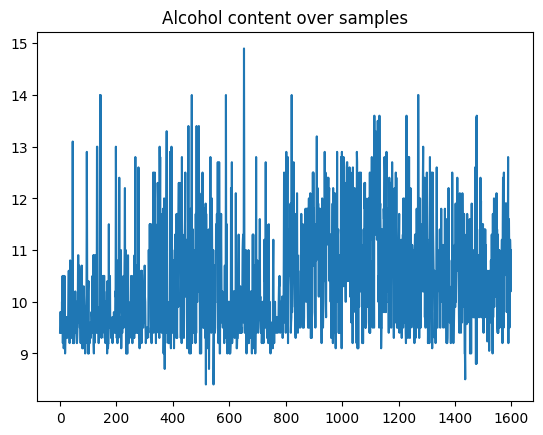

In [79]:
# line plot
# by default, the plot() function in pandas creates a line plot if no kind is specified

df['alcohol'].plot(title='Alcohol content over samples')

<Axes: title={'center': 'Line graph'}>

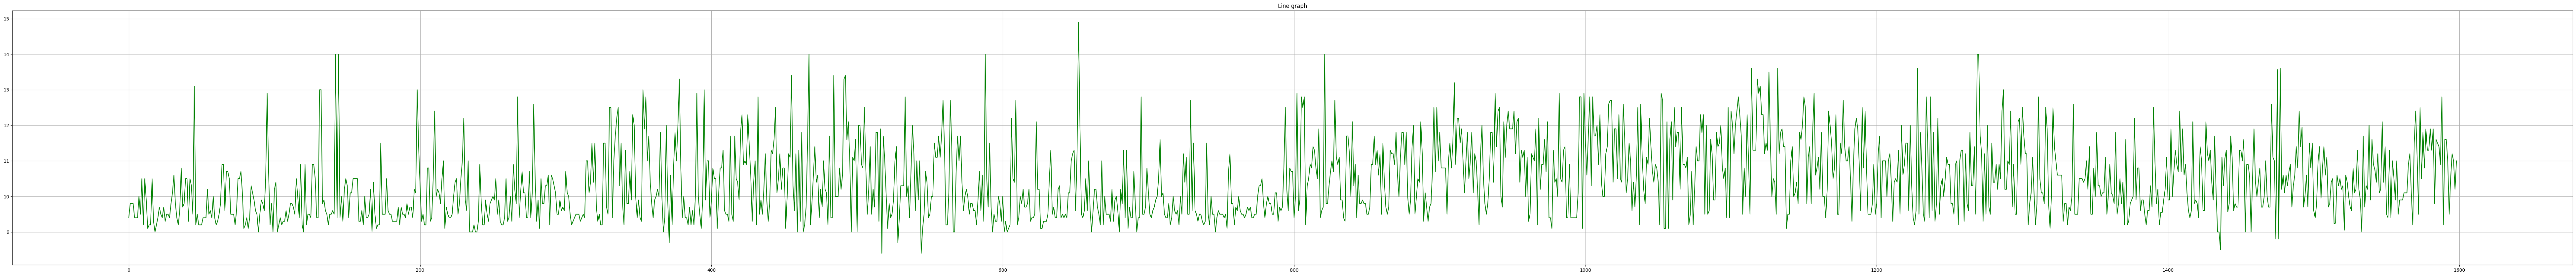

In [80]:
df['alcohol'].plot(kind='line', title='Line graph', color='green', figsize=(100,10), grid=True)
# using figsize to spread out
# using color to set color
# using grid for readability

<Axes: title={'center': 'Quality dist.'}>

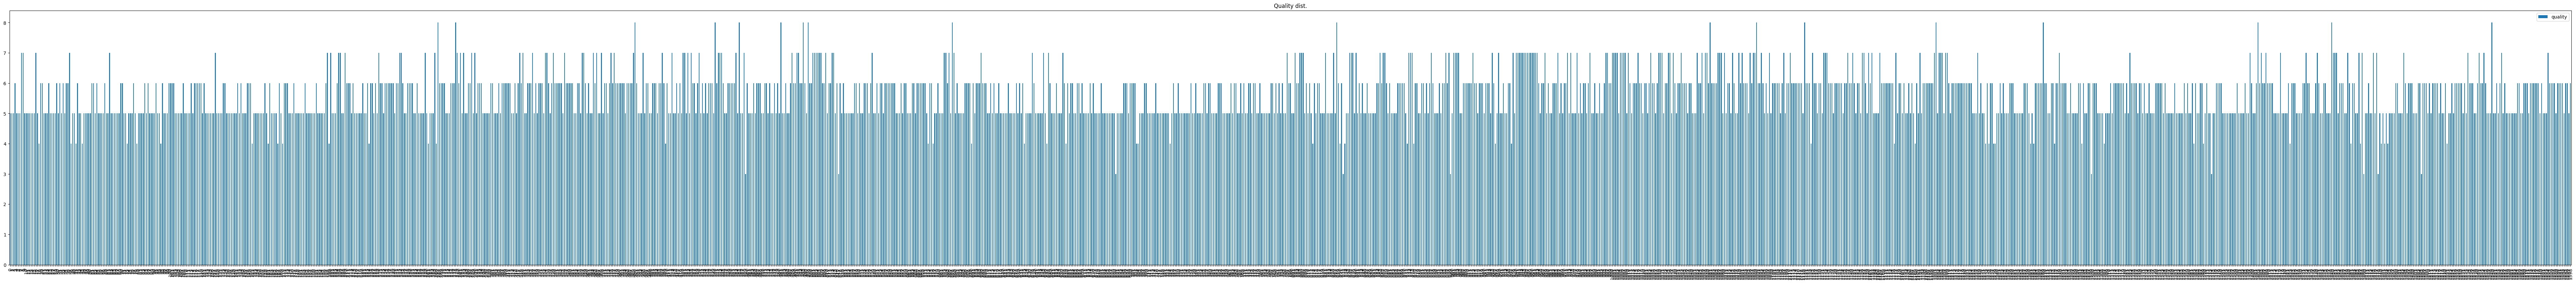

In [81]:
# bar plot
df['quality'].plot(kind='bar', title='Quality dist.', figsize=(100,10), legend=True)

# displays legend on plot

<Axes: title={'center': 'pH Dist'}, ylabel='Frequency'>

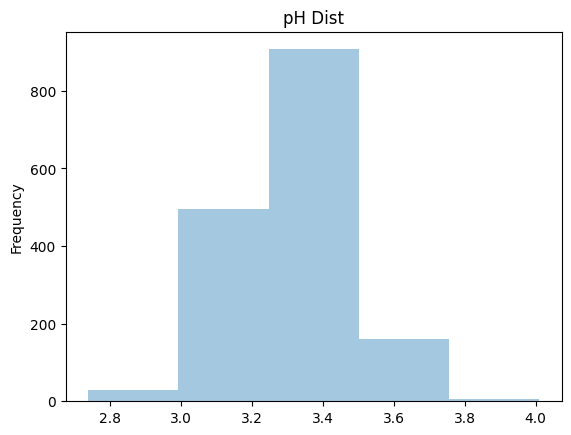

In [82]:
# histogram
df['pH'].plot(kind='hist', title='pH Dist', bins=5, alpha=0.4)

# set no. of bins for histogram
# alpha sets transparency of bars from 0.0 to 1.0

<Axes: title={'center': 'pH vs Fixed acidity'}, xlabel='fixed acidity', ylabel='pH'>

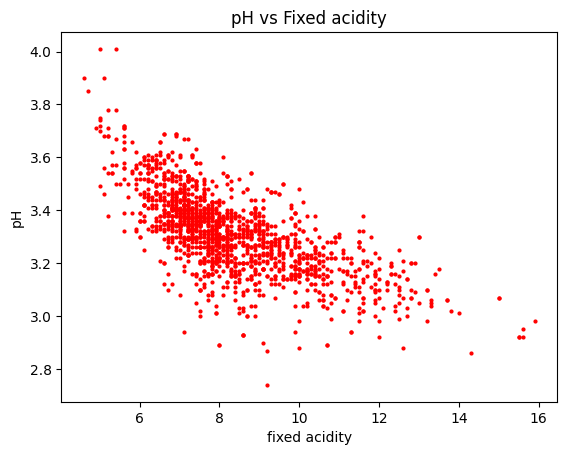

In [83]:
# scatter plot
# scatter plot between pH and fixed acidity
df.plot(kind='scatter', x='fixed acidity', y='pH', title='pH vs Fixed acidity', c='red', s=4)

# c sets color of points
# s sets size of points

<Axes: >

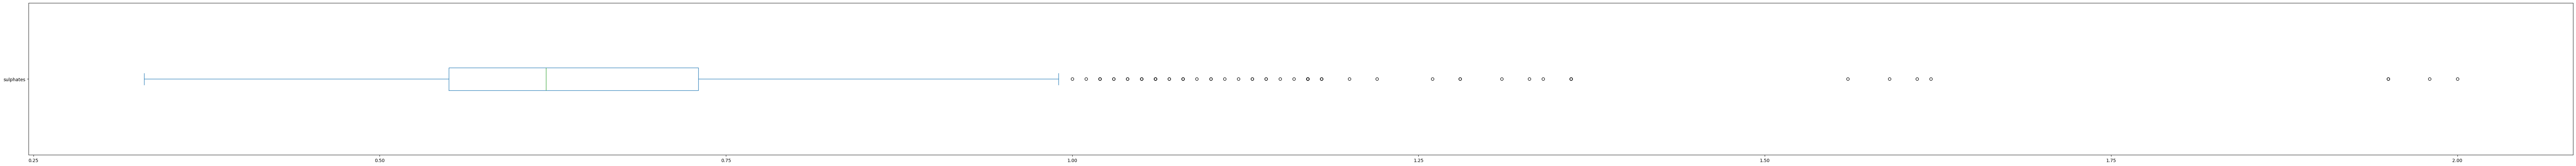

In [84]:
# box plot
df['sulphates'].plot(kind='box', vert=False, figsize=(100,6))

# vert sets vertical or horizontal graph

<Axes: >

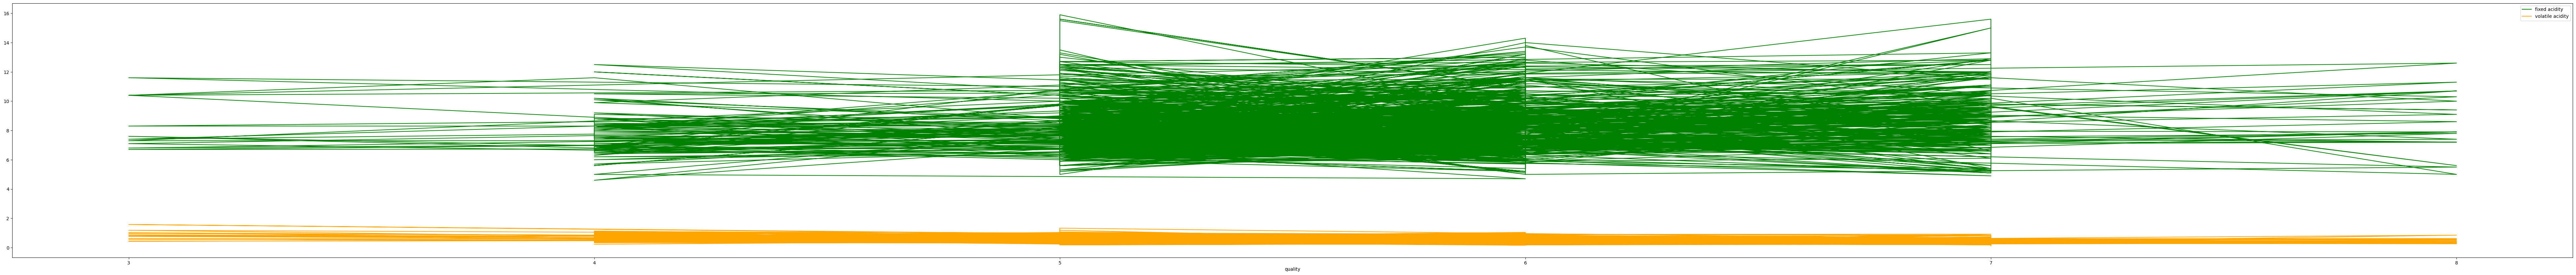

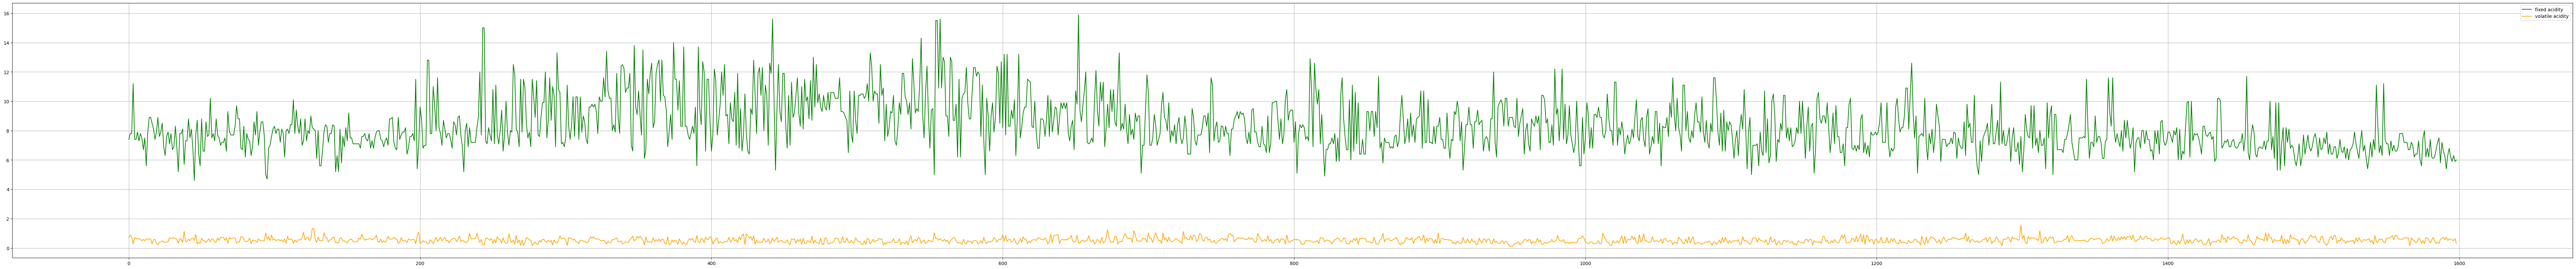

In [85]:
# plotting multiple cols with another col

df.plot(x='quality', y=['fixed acidity', 'volatile acidity'], kind='line', figsize=(100,10), color=['green', 'orange']) # makes no sense plot
df.plot(y=['fixed acidity', 'volatile acidity'], kind='line', figsize=(100,10), color=['green', 'orange'], grid=True) # plotting with x as index

| Plot Type       | Syntax Example                                                                 | Description                                                                 | Key Parameters & Accepted Values                                                                 | Use Case                                                                                      |
|-----------------|--------------------------------------------------------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| Line Plot       | `df['alcohol'].plot(kind='line', title='Alcohol Content', figsize=(10, 6))`    | Visualizes trends over time or ordered categories.                          | `kind`: `'line'`<br>`title`: `str`<br>`figsize`: `(width, height)`<br>`color`: `str`<br>`grid`: `bool` | Analyzing trends in data over a sequence or time.                                             |
| Bar Plot        | `df['quality'].plot(kind='bar', title='Quality Distribution', color='blue')`   | Compares quantities corresponding to different groups.                      | `kind`: `'bar'`<br>`title`: `str`<br>`color`: `str`<br>`legend`: `bool`                          | Comparing categorical data, such as quality ratings.                                          |
| Histogram       | `df['pH'].plot(kind='hist', title='pH Distribution', bins=5, alpha=0.7)`       | Shows the distribution of a single variable.                                | `kind`: `'hist'`<br>`title`: `str`<br>`bins`: `int`<br>`alpha`: `float` (0 to 1)                 | Visualizing the frequency distribution of a variable.                                         |
| Scatter Plot    | `df.plot(kind='scatter', x='fixed acidity', y='pH', title='Acidity vs pH')`    | Displays the relationship between two variables.                            | `kind`: `'scatter'`<br>`x`: `str`<br>`y`: `str`<br>`title`: `str`<br>`c`: `str`<br>`s`: `int`    | Exploring correlations between two continuous variables.                                      |
| Box Plot        | `df['sulphates'].plot(kind='box', title='Sulphates Distribution', vert=False)` | Shows the distribution of data based on a five-number summary.              | `kind`: `'box'`<br>`title`: `str`<br>`vert`: `bool`                                              | Identifying outliers and understanding the spread of data.                                    |
| Multiple Columns| `df.plot(x='quality', y=['fixed acidity', 'volatile acidity'], kind='line')`   | Plots multiple columns against another column.                              | `x`: `str`<br>`y`: `list of str`<br>`kind`: `'line'`<br>`title`: `str`<br>`figsize`: `(width, height)`<br>`color`: `list of str` | Comparing multiple variables against a single reference variable.                             |


# At A Glance

| **Concept**               | **Operator / Function** | **Description**                                                   | **Input Parameters**                            | **Syntax**                     | **Output**                    | **Return Value**        | **Example**                                                                                      |
|---------------------------|-------------------------|-------------------------------------------------------------------|------------------------------------------------|-------------------------------|-----------------------------|------------------------|--------------------------------------------------------------------------------------------------|
| **Creating DataFrames**   | `pd.DataFrame()`        | Create a DataFrame from lists, dicts, or arrays.                  | `data`, `index`, `columns`, `dtype`, etc.      | `pd.DataFrame(data, index)`   | DataFrame                   | DataFrame              | `pd.DataFrame({'A': [1, 2], 'B': [3, 4]})`                                                     |
| **Creating Series**       | `pd.Series()`           | Create a Series (1D array) from data.                             | `data`, `index`, `dtype`                       | `pd.Series(data, index)`      | Series                     | Series                | `pd.Series([10, 20, 30], index=['a', 'b', 'c'])`                                              |
| **Reading Data**          | `pd.read_csv()`         | Read data from a CSV file into a DataFrame.                       | `filepath`, `sep`, `header`, `dtype`, etc.     | `pd.read_csv(filepath)`       | DataFrame                   | DataFrame              | `pd.read_csv('data.csv')`                                                                     |
|                           | `pd.read_excel()`       | Read data from an Excel file.                                     | `io`, `sheet_name`, `dtype`, etc.              | `pd.read_excel(io)`           | DataFrame                   | DataFrame              | `pd.read_excel('data.xlsx')`                                                                  |
| **Writing Data**          | `pd.to_csv()`           | Write DataFrame to a CSV file.                                    | `path`, `sep`, `index`, `header`, etc.         | `df.to_csv(path)`             | CSV file                   | None                  | `df.to_csv('output.csv', index=False)`                                                       |
|                           | `pd.to_excel()`         | Write DataFrame to an Excel file.                                 | `excel_writer`, `sheet_name`, etc.             | `df.to_excel(path)`           | Excel file                 | None                  | `df.to_excel('output.xlsx', index=False)`                                                    |
| **Index Operations**      | `.set_index()`          | Set a column as the DataFrame index.                              | `keys`, `drop`, `append`, etc.                 | `df.set_index('col')`         | Modified DataFrame          | DataFrame              | `df.set_index('Name')`                                                                       |
|                           | `.reset_index()`        | Reset the index of the DataFrame.                                 | `drop`, `inplace`, etc.                        | `df.reset_index()`            | Modified DataFrame          | DataFrame              | `df.reset_index(drop=True)`                                                                  |
|                           | `.sort_index()`         | Sort the DataFrame by its index.                                  | `axis`, `ascending`, `inplace`, etc.           | `df.sort_index()`             | Sorted DataFrame            | DataFrame              | `df.sort_index(ascending=False)`                                                             |
| **Filtering & Selection** | `.loc[]`               | Access rows/columns by label(s) or conditional filtering.          | `row`, `column`                                | `df.loc[row, col]`            | DataFrame/Series subset      | DataFrame/Series       | `df.loc[df['Salary'] > 50000]`                                                               |
|                           | `.iloc[]`              | Access rows/columns by integer-based index positions.             | `row`, `column`                                | `df.iloc[row, col]`           | DataFrame/Series subset      | DataFrame/Series       | `df.iloc[0:3, 1:2]`                                                                         |
| **Sorting**               | `.sort_values()`       | Sort DataFrame by values in a specific column.                    | `by`, `ascending`, `axis`, etc.                | `df.sort_values(by='col')`    | Sorted DataFrame            | DataFrame              | `df.sort_values(by='Age', ascending=True)`                                                   |
| **Renaming**              | `.rename()`            | Rename specific columns or index labels.                         | `columns`, `index`, `inplace`, etc.            | `df.rename(columns={})`       | Modified DataFrame          | DataFrame              | `df.rename(columns={'OldCol': 'NewCol'})`                                                   |
| **Handling Missing Data** | `.isnull()`            | Check for missing (NaN) values.                                  | None                                           | `df.isnull()`                 | Boolean DataFrame           | DataFrame              | `df['Column'].isnull()`                                                                     |
|                           | `.notnull()`           | Check for non-missing values.                                    | None                                           | `df.notnull()`                | Boolean DataFrame           | DataFrame              | `df['Column'].notnull()`                                                                    |
|                           | `.fillna()`            | Fill missing values with a specified value or method.             | `value`, `method`, `axis`, etc.                | `df.fillna(value)`            | Modified DataFrame          | DataFrame              | `df.fillna(0)`                                                                              |
|                           | `.dropna()`            | Drop rows or columns with missing values.                        | `axis`, `how`, `thresh`, etc.                  | `df.dropna(axis=0)`           | Modified DataFrame          | DataFrame              | `df.dropna(axis=0, subset=['Column'])`                                                      |
| **Grouping & Aggregation**| `.groupby()`           | Group rows by column(s) and apply aggregation functions.          | `by`, `axis`, `level`, etc.                    | `df.groupby(by='col')`        | Grouped object              | DataFrameGroupBy       | `df.groupby('Department').mean()`                                                          |
|                           | `.agg()`              | Apply multiple aggregation functions to grouped data.             | Dict of column-function mappings               | `df.groupby().agg({})`        | Aggregated DataFrame         | DataFrame              | `df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'mean'})`                            |
| **Joining/Merging**       | `pd.merge()`           | Merge two DataFrames based on a key column.                      | `on`, `how`, `left_on`, `right_on`, etc.       | `pd.merge(df1, df2, on='key')`| Merged DataFrame            | DataFrame              | `pd.merge(df1, df2, on='CustomerID', how='inner')`                                          |
|                           | `.join()`              | Join DataFrames by index.                                        | `other`, `on`, `how`, etc.                     | `df.join(other)`              | Merged DataFrame            | DataFrame              | `df1.join(df2, how='outer')`                                                               |
|                           | `pd.concat()`          | Concatenate DataFrames along a specific axis.                    | `objs`, `axis`, `ignore_index`, etc.           | `pd.concat([df1, df2])`       | Concatenated DataFrame       | DataFrame              | `pd.concat([df1, df2], axis=1)`                                                            |
| **Data Cleaning**         | `.str.replace()`       | Replace text in a string column.                                | `to_replace`, `value`, etc.                    | `df['col'].str.replace()`     | Modified Series              | Series                | `df['Column'].str.replace('Old', 'New')`                                                   |
|                           | `.drop_duplicates()`   | Remove duplicate rows.                                           | `subset`, `keep`, `inplace`, etc.              | `df.drop_duplicates()`         | Modified DataFrame          | DataFrame              | `df.drop_duplicates(subset=['Column'])`                                                    |
